In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

Reading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/yelp.csv")

Mounted at /content/drive


The number of Rows in our data

In [3]:
len(data)

10000

In [4]:
features = data.text
labels = data.stars - 1

Getting the Longest Sentence's number of words

In [5]:
data['split_text'] = data['text'].str.split()
data['length'] = data['split_text'].apply(lambda x: len(x))
np.max(data["length"])

945

Creating the Tokenizer

In [27]:
max_sequence_length = 900

tokenizer = Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    oov_token="<oov>",
    lower=True
    )

Updateing the tokenizer’s internal vocabulary based on a list of texts(features).

In [28]:
tokenizer.fit_on_texts(features)

Transforming each review into an array of integers

In [29]:
sequences = tokenizer.texts_to_sequences(features)

Getting the word-to-index dictionary from the tokenizer

In [30]:
word_index = tokenizer.word_index

Apply Padding to sequences

In [31]:
padded_sequences = pad_sequences(sequences, padding='pre', maxlen=max_sequence_length, truncating='pre')

Spliting the data into training and testing

In [32]:
train_reviews = padded_sequences[:9000]
train_labels = to_categorical(labels[:9000], num_classes=5)
test_reviews = padded_sequences[9000:]
test_labels = to_categorical(labels[9000:], num_classes=5)

Building the Model

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 100, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Training the Model

In [34]:
history = model.fit(
    train_reviews,
    train_labels,
    epochs=10,
    batch_size=30,
    validation_data=(test_reviews, test_labels)
)

Epoch 1/10
300/300 [==============================] - 6s 19ms/step - loss: 1.4450 - accuracy: 0.3454 - val_loss: 1.3883 - val_accuracy: 0.3780
Epoch 2/10
300/300 [==============================] - 6s 21ms/step - loss: 1.4155 - accuracy: 0.3538 - val_loss: 1.3646 - val_accuracy: 0.3910
Epoch 3/10
300/300 [==============================] - 6s 19ms/step - loss: 1.3507 - accuracy: 0.3777 - val_loss: 1.2585 - val_accuracy: 0.4600
Epoch 4/10
300/300 [==============================] - 6s 21ms/step - loss: 1.2069 - accuracy: 0.4392 - val_loss: 1.1407 - val_accuracy: 0.4930
Epoch 5/10
300/300 [==============================] - 6s 20ms/step - loss: 1.0954 - accuracy: 0.4994 - val_loss: 1.0811 - val_accuracy: 0.5080
Epoch 6/10
300/300 [==============================] - 6s 21ms/step - loss: 1.0102 - accuracy: 0.5473 - val_loss: 1.0454 - val_accuracy: 0.5230
Epoch 7/10
300/300 [==============================] - 6s 19ms/step - loss: 0.9291 - accuracy: 0.6000 - val_loss: 1.0335 - val_accuracy: 0.5360

Evaluating the model on the test data

In [35]:
loss, accuracy = model.evaluate(test_reviews, test_labels)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


32/32 [==============================] - 0s 3ms/step - loss: 1.0549 - accuracy: 0.5580
Test loss: 1.0548855066299438
Test accuracy: 0.5580000281333923


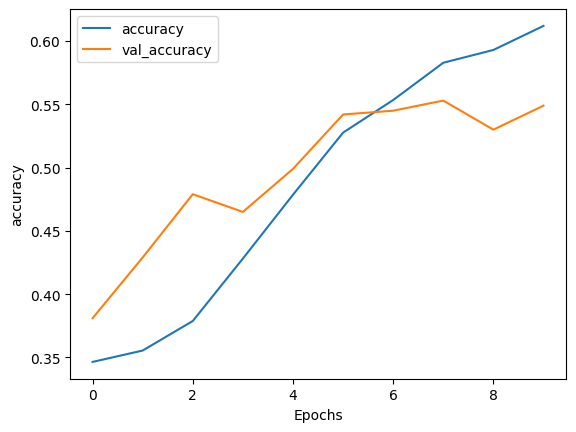

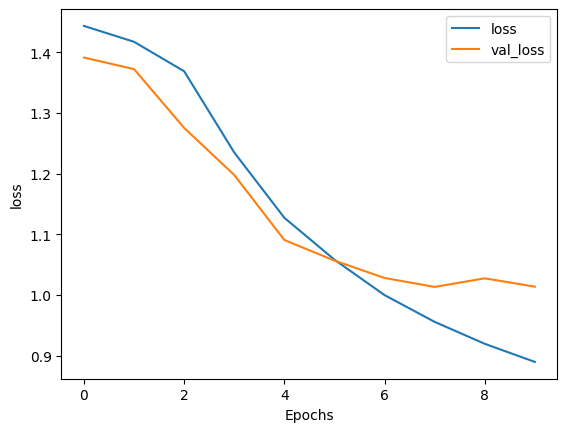

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Testing in a single review

In [122]:
review = "i did not like the food and i had the worst experience ever, i am not going back definitly"

review_sequence = tokenizer.texts_to_sequences([review])
review_padded = pad_sequences(review_sequence, maxlen=max_sequence_length,padding="pre",truncating="pre")

predictions = model.predict(review_padded)
predicted_label = np.argmax(predictions)

predicted_rating = predicted_label + 1

print("Predicted rating:", predicted_rating)

1/1 [==============================] - 0s 48ms/step
Predicted rating: 5
